In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


name = 'human'
file = '/u/jschubert/learning_bias/humans/conf_bias/rw_fitting_exp2.csv'

full_df = pd.read_csv(file)


# drop rows of part_run.max() because they are not complete
full_df = full_df[full_df['part_run'] != full_df['part_run'].max()]
full_df.part_run.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

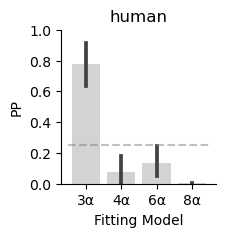

In [2]:
p = full_df[full_df['llm'] == name]
pivoted = p.pivot(index='part_run', columns='fitting_model', values='bic')

# calculate PP
bic_diff = pivoted.sub(pivoted.min(axis=1), axis=0)
unnormalized_pp = np.exp(-0.5 * bic_diff)
normalized_pp = unnormalized_pp.div(unnormalized_pp.sum(axis=1), axis=0)

# convert to plotting format
reset = normalized_pp.reset_index()
reset.head()
melt = reset.melt(id_vars='part_run', 
            value_vars=reset.columns[1:],
            var_name='fitting_model',
            value_name='bic')


plt.figure(figsize=(2,2))
plt.ylim(0, 1)

sns.barplot(data=melt, x='fitting_model', y='bic', color='lightgrey')
sns.despine()

# change labels to 2α 3α 4α
labels = ['3α', '4α', '6α', '8α']
plt.xticks(np.arange(4), labels)
plt.xlabel('Fitting Model')
plt.ylabel('PP')
plt.title(name)

plt.hlines(y=melt.mean(numeric_only=True)['bic'], xmin=-0.5, xmax=3.5, linestyle='--', alpha=0.5, color='grey')

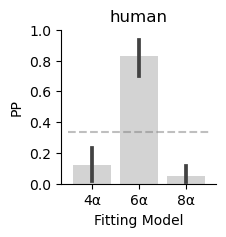

In [3]:
p = full_df[full_df['llm'] == name]
p = p[p['fitting_model'] != 'Model_3alpha']
pivoted = p.pivot(index='part_run', columns='fitting_model', values='bic')

# calculate PP
bic_diff = pivoted.sub(pivoted.min(axis=1), axis=0)
unnormalized_pp = np.exp(-0.5 * bic_diff)
normalized_pp = unnormalized_pp.div(unnormalized_pp.sum(axis=1), axis=0)

# convert to plotting format
reset = normalized_pp.reset_index()
reset.head()
melt = reset.melt(id_vars='part_run', 
            value_vars=reset.columns[1:],
            var_name='fitting_model',
            value_name='bic')


plt.figure(figsize=(2,2))
plt.ylim(0, 1)

sns.barplot(data=melt, x='fitting_model', y='bic', color='lightgrey')
sns.despine()

# change labels to 2α 3α 4α
labels = ['4α', '6α', '8α']
plt.xticks(np.arange(3), labels)
plt.xlabel('Fitting Model')
plt.ylabel('PP')
plt.title(name)

plt.hlines(y=melt.mean(numeric_only=True)['bic'], xmin=-0.5, xmax=2.5, linestyle='--', alpha=0.5, color='grey')


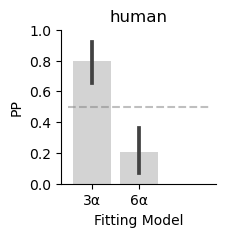

In [4]:
p = full_df[full_df['llm'] == name]
p = p[(p['fitting_model'] == 'Model_3alpha') | (p['fitting_model'] == 'Model_6alpha')]
pivoted = p.pivot(index='part_run', columns='fitting_model', values='bic')

# calculate PP
bic_diff = pivoted.sub(pivoted.min(axis=1), axis=0)
unnormalized_pp = np.exp(-0.5 * bic_diff)
normalized_pp = unnormalized_pp.div(unnormalized_pp.sum(axis=1), axis=0)

# convert to plotting format
reset = normalized_pp.reset_index()
reset.head()
melt = reset.melt(id_vars='part_run', 
            value_vars=reset.columns[1:],
            var_name='fitting_model',
            value_name='bic')


plt.figure(figsize=(2,2))
plt.ylim(0, 1)

sns.barplot(data=melt, x='fitting_model', y='bic', color='lightgrey')
sns.despine()

# change labels to 2α 3α 4α
labels = ['3α', '6α']
plt.xticks(np.arange(2), labels)
plt.xlabel('Fitting Model')
plt.ylabel('PP')
plt.title(name)

plt.hlines(y=melt.mean(numeric_only=True)['bic'], xmin=-0.5, xmax=2.5, linestyle='--', alpha=0.5, color='grey')


Text(0.5, 0.98, 'human - 8α')

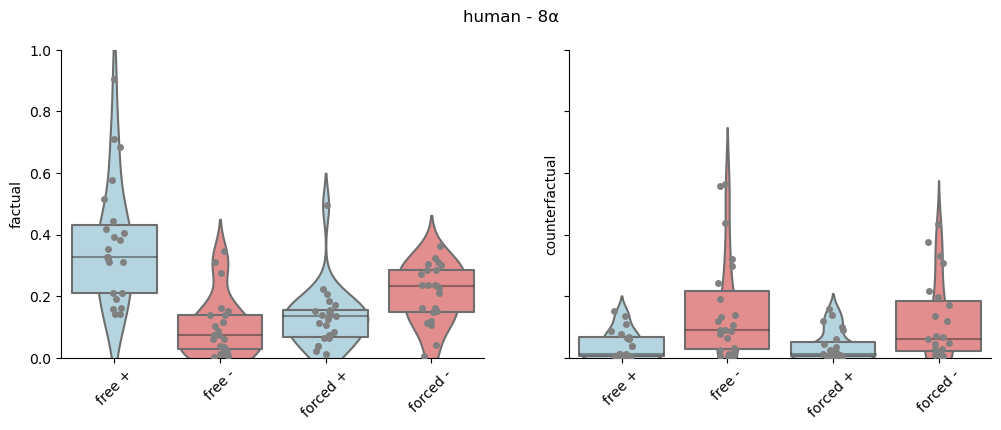

In [10]:
df = full_df[(full_df['llm'] == name) & (full_df['fitting_model'] == 'Model_8alpha')]

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
axs = axs.flatten()
cond = ['chosen', 'unchosen']
label = ['factual', 'counterfactual']

for i, c in enumerate(cond):

    ax = axs[i]

    plot_df = pd.DataFrame({'free +': df[f'alpha_free_pos_{c}'], 
                            'free -': df[f'alpha_free_neg_{c}'], 
                            'forced +': df[f'alpha_forced_pos_{c}'], 
                            'forced -': df[f'alpha_forced_neg_{c}']})

    plt_df = plot_df.melt()

    palette = ['lightblue', 'lightcoral', 'lightblue', 'lightcoral']

    sns.violinplot(x="variable", y="value", data=plt_df, palette=palette, inner=None, ax=ax)
    sns.stripplot(x="variable", y="value", data=plt_df, jitter=True, color='grey', ax=ax)
    sns.boxenplot(x="variable", y="value", data=plt_df, palette=palette, showfliers=False, ax=ax)
    sns.despine(ax=ax)

    ax.set_ylabel(label[i])
    ax.set_xlabel('')
    ax.set_ylim(0, 1)
    ax.set_xticklabels(['free +', 'free -', 'forced +', 'forced -'], rotation=45)

plt.suptitle(f'{name} - 8α')

Text(0.5, 1.0, 'human - Model 3 alpha')

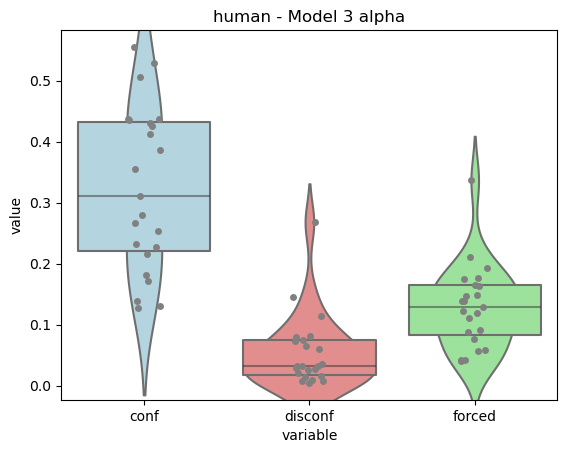

In [6]:
df = full_df[(full_df['llm'] == name) & (full_df['fitting_model'] == 'Model_3alpha')]

plot_df = pd.DataFrame({'conf': df.alpha_conf, 
                        'disconf': df.alpha_disconf, 
                        'forced': df.alpha_forced})

plt_df = plot_df.melt()

palette = ['lightblue', 'lightcoral', 'lightgreen']

sns.violinplot(x="variable", y="value", data=plt_df, palette=palette, inner=None)
sns.stripplot(x="variable", y="value", data=plt_df, jitter=True, color='grey')
sns.boxenplot(x="variable", y="value", data=plt_df, palette=palette, showfliers=False)

plt.title(f'{name} - Model 3 alpha')